# AGH Hackathon Data Science Vol 2 2024
### Plik z funkcją do inwestowania 

Bartosz Pobudejski 

Jan Ślusarek

In [1]:
import yfinance as yf
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [13]:
df=pd.read_csv('dane_close.csv',sep=';')

In [14]:
# Konwersja kolumny 'Data' na typ daty, jeśli jest potrzebna
df['data'] = pd.to_datetime(df['data'])

# Ustawienie kolumny 'Data' jako indeksu DataFrame
df.set_index('data', inplace=True)

# Wyświetlenie zaktualizowanego DataFrame
print(df)

                                 czas     ALE     ALR    BDX     CDR     CPS  \
data                                                                           
1970-01-01 00:00:00.020240319   90000  32.450   94.46  684.0  111.95  10.490   
1970-01-01 00:00:00.020240319   90500  32.490   94.48  683.0  111.70  10.425   
1970-01-01 00:00:00.020240319   91000  32.440   94.14  681.0  111.85  10.455   
1970-01-01 00:00:00.020240319   91500  32.530   94.64  680.0  112.10  10.485   
1970-01-01 00:00:00.020240319   92000  32.550   94.88  684.0  112.75  10.490   
...                               ...     ...     ...    ...     ...     ...   
1970-01-01 00:00:00.020240508  162500  36.415  101.30  728.0  131.60  10.680   
1970-01-01 00:00:00.020240508  163000  36.465  101.25  728.5  131.60  10.690   
1970-01-01 00:00:00.020240508  163500  36.340  101.60  727.5  131.65  10.690   
1970-01-01 00:00:00.020240508  164000  36.375  101.40  727.0  131.85  10.690   
1970-01-01 00:00:00.020240508  164500  3

In [18]:

df=df.drop('czas', axis=1)

In [19]:
df

,ALE,ALR,BDX,CDR,CPS,DNP,JSW,KGH,KRU,KTY,...,PXM,RBW,RVU,SLV,SNT,TEN,TPE,TXT,WPL,XTB
data,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.020240319,32.450,94.46,684.0,111.95,10.490,405.6,37.98,117.40,420.0,747.5,...,4.220,78.8,57.50,61.0,145.5,91.75,3.030,87.4,112.0,53.85
1970-01-01 00:00:00.020240319,32.490,94.48,683.0,111.70,10.425,405.8,38.11,116.85,420.4,747.5,...,4.260,79.0,57.40,61.0,143.5,91.75,3.032,87.1,109.4,53.80
1970-01-01 00:00:00.020240319,32.440,94.14,681.0,111.85,10.455,406.9,38.36,116.75,420.2,742.0,...,4.255,79.6,57.40,60.9,142.0,91.75,3.020,87.1,109.0,53.40
1970-01-01 00:00:00.020240319,32.530,94.64,680.0,112.10,10.485,408.1,38.10,116.70,421.0,744.5,...,4.245,79.0,57.40,60.9,143.0,91.00,3.036,87.4,109.0,53.65
1970-01-01 00:00:00.020240319,32.550,94.88,684.0,112.75,10.490,407.8,38.19,116.70,420.8,746.0,...,4.245,79.0,56.80,60.9,142.5,91.50,3.035,87.3,109.0,53.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.020240508,36.415,101.30,728.0,131.60,10.680,397.7,31.48,147.05,461.2,885.0,...,3.468,91.4,50.00,71.0,130.0,87.95,3.217,92.6,117.2,67.18
1970-01-01 00:00:00.020240508,36.465,101.25,728.5,131.60,10.690,397.8,31.46,146.60,461.0,884.5,...,3.462,91.2,50.00,71.0,129.0,88.00,3.214,92.4,117.2,67.00
1970-01-01 00:00:00.020240508,36.340,101.60,727.5,131.65,10.690,397.6,31.43,146.35,461.2,883.5,...,3.454,91.2,50.00,71.0,129.2,87.95,3.204,92.5,117.2,67.06


In [22]:
df=df.reset_index()

In [26]:
df=df.drop('data',axis=1)

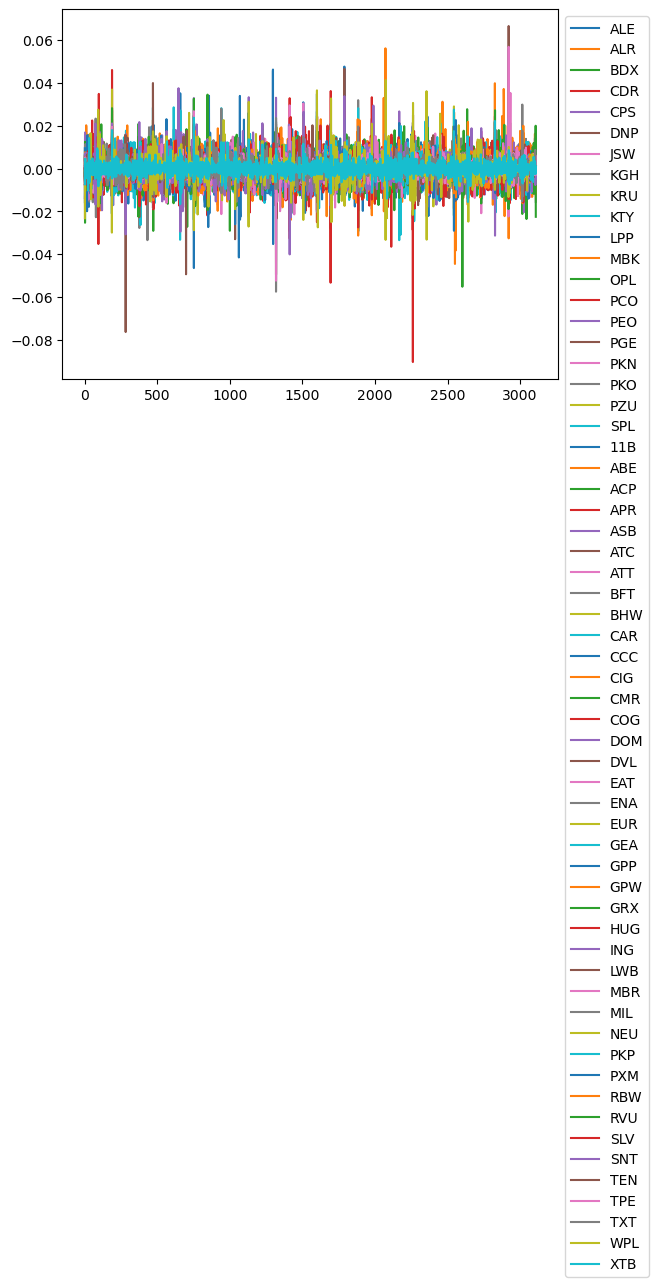

In [27]:
df.pct_change().plot()
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

In [28]:
df.describe()

,ALE,ALR,BDX,CDR,CPS,DNP,JSW,KGH,KRU,KTY,...,PXM,RBW,RVU,SLV,SNT,TEN,TPE,TXT,WPL,XTB
count,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,...,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000
mean,32.707441,101.092702,695.601640,116.788935,10.337584,379.897427,34.682869,131.979736,444.773175,799.078482,...,3.918777,79.539434,53.691878,67.168607,135.484850,92.041943,3.011136,91.551656,119.449405,58.694538
std,1.495897,3.925145,15.918302,4.308667,0.300196,13.996572,2.702140,12.413378,14.726994,43.763080,...,0.274865,5.590095,2.788537,3.042548,9.662007,3.340239,0.116988,2.983901,4.199584,3.549775
min,30.570000,91.120000,661.000000,109.600000,9.696000,355.400000,29.570000,108.750000,413.000000,711.500000,...,3.340000,70.400000,47.050000,60.200000,117.600000,84.200000,2.775000,87.100000,109.000000,52.600000
25%,31.695000,98.200000,683.000000,114.450000,10.085000,369.600000,32.050000,118.200000,433.800000,758.000000,...,3.714000,76.000000,51.000000,66.300000,128.200000,89.600000,2.908000,89.400000,117.000000,56.400000
50%,32.440000,101.600000,695.000000,116.000000,10.315000,375.400000,35.450000,138.150000,443.400000,800.000000,...,3.954000,78.300000,54.700000,68.200000,131.600000,92.250000,3.033000,90.800000,119.400000,58.300000
75%,33.350000,104.350000,705.500000,117.700000,10.605000,389.500000,37.150000,142.350000,457.400000,839.000000,...,4.170000,80.200000,55.600000,69.300000,144.800000,95.050000,3.103000,92.500000,123.400000,61.200000
max,37.400000,108.350000,740.000000,134.400000,10.945000,415.200000,39.000000,149.250000,479.000000,886.500000,...,4.478000,94.300000,57.500000,72.000000,154.500000,98.400000,3.410000,99.600000,126.600000,67.180000
